# Convolutional Neural Networks - Codealong

## Introduction

In this codealong, we will reinvestigate our previous Santa image classification example. To do this, we will review loading a dataset from a nested directory structure and building a baseline model. From there, we'll build a CNN and demonstrate its improved performance on image recognition tasks. It is recommended you run the cells in order to further explore variables and investigate the code snippets themselves. However, please note that some cells (particularly training cells later on) may take several minutes to run. (On a Macbook pro the entire notebook took ~15 minutes to run.)

## Objectives  

You will be able to:

- Load images from a hierarchical file structure using an image datagenerator 
- Explain why one might augment image data when training a neural network 
- Apply data augmentation to image files before training a neural network 
- Build a CNN using Keras 

## Properly store your images 

When you're analyzing your image data, file management is important. We will be using the santa images again, but this time, they are stored in two folders: `santa` and `not_santa`. We want to work with a `train`, `validation`, and `test` datasets now, as we know by now that this is the best way to obtain unbiased estimate of your model performance.  

Let's import libraries `os` and `shutil`, as we'll need them to create the new folders and move the new files in there.

In [10]:
import os, shutil

Below we create three objects representing the existing directories: `data/santa/` as `data_santa_dir` and `data/not_santa/` as `data_not_santa_dir`. We will create a new directory `split/` as `new_dir`, where we will split the dataset in three groups (or three subdirectories): `train`, `test`, and `validation`, each containing `santa` and `not_santa` subfolders. The final desired structure is represented below: 

![title](images/folder_structure.png)

In [11]:
data_santa_dir = 'data/santa/'
data_not_santa_dir = 'data/not_santa/'
new_dir = 'split/'

You can use `os.listdir()` to create an object that stores all the relevant image names. 

In [12]:
imgs_santa = [file for file in os.listdir(data_santa_dir) if file.endswith('.jpg')]

In [13]:
imgs_santa[0:10]

['00000000.jpg',
 '00000001.jpg',
 '00000003.jpg',
 '00000004.jpg',
 '00000005.jpg',
 '00000006.jpg',
 '00000007.jpg',
 '00000008.jpg',
 '00000009.jpg',
 '00000010.jpg']

Let's see how many images there are in the `santa` directory.

In [44]:
print('There are', len(imgs_santa), 'santa images')

There are 461 santa images


Now, repeat this for the `not_santa` directory: 

In [15]:
imgs_not_santa = [file for file in os.listdir(data_not_santa_dir) if file.endswith('.jpg')]

In [16]:
print('There are', len(imgs_not_santa), 'images without santa')

There are 461 images without santa


Create all the folders and subfolders in order to get the structure represented above. You can use `os.path.join()` to create strings that will be used later on to generate new directories.

In [17]:
# os.mkdir(new_dir)

FileExistsError: [WinError 183] Cannot create a file when that file already exists: 'split/'

In [18]:
train_folder = os.path.join(new_dir, 'train')
train_santa = os.path.join(train_folder, 'santa')
train_not_santa = os.path.join(train_folder, 'not_santa')

test_folder = os.path.join(new_dir, 'test')
test_santa = os.path.join(test_folder, 'santa')
test_not_santa = os.path.join(test_folder, 'not_santa')

val_folder = os.path.join(new_dir, 'validation')
val_santa = os.path.join(val_folder, 'santa')
val_not_santa = os.path.join(val_folder, 'not_santa')

In [19]:
train_santa

'split/train\\santa'

Now use all the path strings you created to make new directories. You can use `os.mkdir()` to do this. Go have a look at your directory and see if this worked!

In [20]:
os.mkdir(test_folder)
os.mkdir(test_santa)
os.mkdir(test_not_santa)

os.mkdir(train_folder)
os.mkdir(train_santa)
os.mkdir(train_not_santa)

os.mkdir(val_folder)
os.mkdir(val_santa)
os.mkdir(val_not_santa)

FileExistsError: [WinError 183] Cannot create a file when that file already exists: 'split/test'

Copy the Santa images in the three santa subfolders. Let's put the first 271 images in the training set, the next 100 images in the validation set and the final 90 images in the test set.

In [21]:
# train santa
imgs = imgs_santa[:271]
for img in imgs:
    origin = os.path.join(data_santa_dir, img)
    destination = os.path.join(train_santa, img)
    shutil.copyfile(origin, destination)

In [22]:
# validation santa
imgs = imgs_santa[271:371]
for img in imgs:
    origin = os.path.join(data_santa_dir, img)
    destination = os.path.join(val_santa, img)
    shutil.copyfile(origin, destination)

In [23]:
# test santa
imgs = imgs_santa[371:]
for img in imgs:
    origin = os.path.join(data_santa_dir, img)
    destination = os.path.join(test_santa, img)
    shutil.copyfile(origin, destination)

Now, repeat all this for the `not_santa` images!

In [24]:
# train not_santa
imgs = imgs_not_santa[:271]
for img in imgs:
    origin = os.path.join(data_not_santa_dir, img)
    destination = os.path.join(train_not_santa, img)
    shutil.copyfile(origin, destination)
# validation not_santa
imgs = imgs_not_santa[271:371]
for img in imgs:
    origin = os.path.join(data_not_santa_dir, img)
    destination = os.path.join(val_not_santa, img)
    shutil.copyfile(origin, destination)
# test not_santa
imgs = imgs_not_santa[371:]
for img in imgs:
    origin = os.path.join(data_not_santa_dir, img)
    destination = os.path.join(test_not_santa, img)
    shutil.copyfile(origin, destination)

Let's print out how many images we have in each directory so we know for sure our numbers are right!

In [25]:
print('There are', len(os.listdir(train_santa)), 'santa images in the training set')

There are 381 santa images in the training set


In [26]:
print('There are', len(os.listdir(val_santa)), 'santa images in the validation set')

There are 182 santa images in the validation set


In [27]:
print('There are', len(os.listdir(test_santa)), 'santa images in the test set')

There are 167 santa images in the test set


In [28]:
print('There are', len(os.listdir(train_not_santa)), 'images without santa in the train set')

There are 383 images without santa in the train set


In [29]:
print('There are', len(os.listdir(val_not_santa)), 'images without santa in the validation set')

There are 178 images without santa in the validation set


In [30]:
print('There are', len(os.listdir(test_not_santa)), 'images without santa in the test set')

There are 157 images without santa in the test set


## Use a densely connected network as a baseline

Now that we've a handle on our data, we can easily use Keras' module with image-processing tools. Let's import the necessary libraries below. 

In [31]:
import time
import matplotlib.pyplot as plt
import scipy
import numpy as np
from PIL import Image
from scipy import ndimage
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

np.random.seed(123)

Using TensorFlow backend.
C:\Users\tcast\anaconda3\envs\learn-env\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\tcast\anaconda3\envs\learn-env\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\tcast\anaconda3\envs\learn-env\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\tcast\anaconda3\envs\learn

In [33]:
# get all the data in the directory split/test (180 images), and reshape them
test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        test_folder, 
        target_size=(64, 64), batch_size = 180) 

# get all the data in the directory split/validation (200 images), and reshape them
val_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        val_folder, 
        target_size=(64, 64), batch_size = 200)

# get all the data in the directory split/train (542 images), and reshape them
train_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        train_folder, 
        target_size=(64, 64), batch_size=542)

Found 324 images belonging to 2 classes.
Found 360 images belonging to 2 classes.
Found 764 images belonging to 2 classes.


In [34]:
# create the data sets
train_images, train_labels = next(train_generator)
test_images, test_labels = next(test_generator)
val_images, val_labels = next(val_generator)

In [35]:
# Explore your dataset again
m_train = train_images.shape[0]
num_px = train_images.shape[1]
m_test = test_images.shape[0]
m_val = val_images.shape[0]

print ("Number of training samples: " + str(m_train))
print ("Number of testing samples: " + str(m_test))
print ("Number of validation samples: " + str(m_val))
print ("train_images shape: " + str(train_images.shape))
print ("train_labels shape: " + str(train_labels.shape))
print ("test_images shape: " + str(test_images.shape))
print ("test_labels shape: " + str(test_labels.shape))
print ("val_images shape: " + str(val_images.shape))
print ("val_labels shape: " + str(val_labels.shape))

Number of training samples: 542
Number of testing samples: 180
Number of validation samples: 200
train_images shape: (542, 64, 64, 3)
train_labels shape: (542, 2)
test_images shape: (180, 64, 64, 3)
test_labels shape: (180, 2)
val_images shape: (200, 64, 64, 3)
val_labels shape: (200, 2)


In [36]:
train_img = train_images.reshape(train_images.shape[0], -1)
test_img = test_images.reshape(test_images.shape[0], -1)
val_img = val_images.reshape(val_images.shape[0], -1)

print(train_img.shape)
print(test_img.shape)
print(val_img.shape)

(542, 12288)
(180, 12288)
(200, 12288)


In [37]:
train_y = np.reshape(train_labels[:,0], (542,1))
test_y = np.reshape(test_labels[:,0], (180,1))
val_y = np.reshape(val_labels[:,0], (200,1))

In [38]:
# Build a baseline fully connected model
from keras import models
from keras import layers
np.random.seed(123)
model = models.Sequential()
model.add(layers.Dense(20, activation='relu', input_shape=(12288,))) # 2 hidden layers
model.add(layers.Dense(7, activation='relu'))
model.add(layers.Dense(5, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [39]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

histoire = model.fit(train_img,
                    train_y,
                    epochs=50,
                    batch_size=32,
                    validation_data=(val_img, val_y))

Train on 542 samples, validate on 200 samples
Epoch 1/50
542/542 [==============================] - 0s 336us/step - loss: 0.7082 - acc: 0.4945 - val_loss: 0.6663 - val_acc: 0.4900
Epoch 2/50
542/542 [==============================] - 0s 135us/step - loss: 0.6748 - acc: 0.5129 - val_loss: 0.6668 - val_acc: 0.6550
Epoch 3/50
542/542 [==============================] - 0s 136us/step - loss: 0.6602 - acc: 0.5609 - val_loss: 0.6361 - val_acc: 0.5150
Epoch 4/50
542/542 [==============================] - 0s 138us/step - loss: 0.6483 - acc: 0.6107 - val_loss: 0.6192 - val_acc: 0.6350
Epoch 5/50
542/542 [==============================] - 0s 132us/step - loss: 0.6302 - acc: 0.6365 - val_loss: 0.6005 - val_acc: 0.6850
Epoch 6/50
542/542 [==============================] - 0s 140us/step - loss: 0.6173 - acc: 0.6679 - val_loss: 0.5812 - val_acc: 0.7400
Epoch 7/50
542/542 [==============================] - 0s 136us/step - loss: 0.5896 - acc: 0.6974 - val_loss: 0.5933 - val_acc: 0.5350
Epoch 8/50
542/5

In [40]:
results_train = model.evaluate(train_img, train_y)

542/542 [==============================] - 0s 77us/step


In [41]:
results_test = model.evaluate(test_img, test_y)

180/180 [==============================] - 0s 78us/step


In [42]:
results_train

[0.13019864714783497, 0.9594095925563376]

In [43]:
results_test

[0.31645469301276735, 0.8777777764532301]

Remember that, in our previous lab on building deeper neural networks from scratch, we obtained a training accuracy of 95%, and a test set accuracy of 74.23%. 

This result is similar to what we got building our manual "deeper" dense model. The results are not entirely different. This is not a surprise!
- Before, we only had a training and a validation set (which was at the same time the test set). Now we have split up the data 3-ways.
- We didn't use minibatches before, yet we used mini-batches of 32 units here.
 
## Build a CNN

In [45]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(64 ,64,  3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(32, (4, 4), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer="sgd",
              metrics=['acc'])

In [46]:
history = model.fit(train_images,
                    train_y,
                    epochs=30,
                    batch_size=32,
                    validation_data=(val_images, val_y))

Train on 542 samples, validate on 200 samples
Epoch 1/30
542/542 [==============================] - 2s 3ms/step - loss: 0.6866 - acc: 0.4797 - val_loss: 0.6711 - val_acc: 0.5150
Epoch 2/30
542/542 [==============================] - 2s 3ms/step - loss: 0.6765 - acc: 0.4852 - val_loss: 0.6649 - val_acc: 0.5150
Epoch 3/30
542/542 [==============================] - 2s 3ms/step - loss: 0.6694 - acc: 0.4889 - val_loss: 0.6532 - val_acc: 0.5200
Epoch 4/30
542/542 [==============================] - 2s 3ms/step - loss: 0.6599 - acc: 0.5277 - val_loss: 0.6402 - val_acc: 0.5200
Epoch 5/30
542/542 [==============================] - 2s 3ms/step - loss: 0.6499 - acc: 0.5332 - val_loss: 0.6351 - val_acc: 0.7400
Epoch 6/30
542/542 [==============================] - 2s 4ms/step - loss: 0.6372 - acc: 0.6439 - val_loss: 0.6162 - val_acc: 0.7650
Epoch 7/30
542/542 [==============================] - 2s 4ms/step - loss: 0.6202 - acc: 0.7030 - val_loss: 0.6145 - val_acc: 0.8800
Epoch 8/30
542/542 [==========

In [47]:
results_train = model.evaluate(train_images, train_y)

542/542 [==============================] - 1s 1ms/step


In [48]:
results_test = model.evaluate(test_images, test_y)

180/180 [==============================] - 0s 1ms/step


In [49]:
results_train

[0.2794310061804043, 0.9077490759511715]

In [50]:
results_test

[0.2901491628752814, 0.9000000013245477]

## Data Augmentation

`ImageDataGenerator()` becomes really useful when we *actually* want to generate more data. We'll show you how this works. 

In [51]:
train_datagen = ImageDataGenerator(rescale=1./255, 
                                   rotation_range=40, 
                                   width_shift_range=0.2, 
                                   height_shift_range=0.2, 
                                   shear_range=0.3, 
                                   zoom_range=0.1, 
                                   horizontal_flip=False)

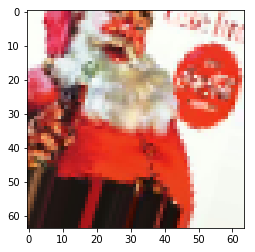

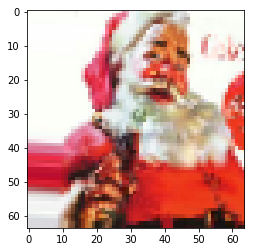

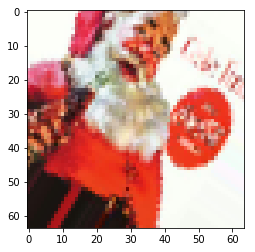

In [52]:
names = [os.path.join(train_santa, name) for name in os.listdir(train_santa)]
img_path = names[91]
img = load_img(img_path, target_size=(64, 64))

reshape_img = img_to_array(img) 
reshape_img = reshape_img.reshape((1,) + reshape_img.shape) 
i=0
for batch in train_datagen.flow(reshape_img, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(array_to_img(batch[0]))
    i += 1
    if i % 3 == 0:
        break
plt.show()

In [53]:
# get all the data in the directory split/test (180 images), and reshape them
test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        test_folder, 
        target_size=(64, 64), 
        batch_size = 180,
        class_mode='binary') 

# get all the data in the directory split/validation (200 images), and reshape them
val_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        val_folder, 
        target_size=(64, 64),
        batch_size = 32,
        class_mode='binary')

# get all the data in the directory split/train (542 images), and reshape them
train_generator = train_datagen.flow_from_directory(
        train_folder, 
        target_size=(64, 64), 
        batch_size = 32, 
        class_mode='binary')

Found 324 images belonging to 2 classes.
Found 360 images belonging to 2 classes.
Found 764 images belonging to 2 classes.


In [54]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(64 ,64,  3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(32, (4, 4), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer= 'sgd',
              metrics=['acc'])

In [55]:
history_2 = model.fit_generator(train_generator, 
                                steps_per_epoch=25, 
                                epochs=30, 
                                validation_data=val_generator, 
                                validation_steps=25)

Epoch 1/30
25/25 [==============================] - 10s 389ms/step - loss: 0.6838 - acc: 0.5061 - val_loss: 0.6745 - val_acc: 0.5056
Epoch 2/30
25/25 [==============================] - 10s 386ms/step - loss: 0.6792 - acc: 0.4971 - val_loss: 0.6691 - val_acc: 0.5056
Epoch 3/30
25/25 [==============================] - 9s 346ms/step - loss: 0.6743 - acc: 0.4953 - val_loss: 0.6610 - val_acc: 0.5056
Epoch 4/30
25/25 [==============================] - 9s 361ms/step - loss: 0.6664 - acc: 0.4987 - val_loss: 0.6526 - val_acc: 0.5139
Epoch 5/30
25/25 [==============================] - 11s 421ms/step - loss: 0.6576 - acc: 0.5175 - val_loss: 0.6406 - val_acc: 0.5194
Epoch 6/30
25/25 [==============================] - 9s 350ms/step - loss: 0.6496 - acc: 0.5250 - val_loss: 0.6280 - val_acc: 0.6028
Epoch 7/30
25/25 [==============================] - 9s 364ms/step - loss: 0.6352 - acc: 0.6249 - val_loss: 0.6068 - val_acc: 0.5583
Epoch 8/30
25/25 [==============================] - 9s 373ms/step - loss:

In [56]:
test_x, test_y = next(test_generator)

In [57]:
results_test = model.evaluate(test_x, test_y)

180/180 [==============================] - 0s 1ms/step


In [58]:
results_test

[0.35064866873953077, 0.8888888875643413]

## Summary  

In this code along lab, we looked again at some of the preprocessing techniques needed in order to organize our data prior to building a model using Keras. Afterwards, we investigated new code in order to build a CNN for image recognition.